<a href="https://colab.research.google.com/github/Fabreeeze/DIGIT-CLASSIFICATION/blob/main/ml_ai_pract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Starts here!!


In [ ]:
# !unzip -o "/content/drive/MyDrive/newProjectcollabAIML/archive.zip" -d "/content/drive/MyDrive/newProjectcollabAIML/digit identification project/" 


Data files Unzipped!!

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from matplotlib.pyplot import imread
from IPython.display import Image
from google.colab import drive
from sklearn.model_selection import train_test_split

In [ ]:
print("tensorflow version is : ",tf.__version__)

tensorflow version is :  2.9.2


In [ ]:
print("tensorflow hub version is : ",hub.__version__)

tensorflow hub version is :  0.12.0


In [ ]:
labelsCsv=pd.read_csv("/content/drive/MyDrive/newProjectcollabAIML/digit identification project/train.csv")
print(labelsCsv.describe())
print(labelsCsv.head())

          first_num    second_num
count  64000.000000  64000.000000
mean       4.359375      4.328125
std        2.960002      2.899671
min        0.000000      0.000000
25%        2.000000      2.000000
50%        4.000000      4.000000
75%        7.000000      7.000000
max        9.000000      9.000000
        Image  first_num  second_num
0    0_00.png          0           0
1  100_00.png          0           0
2  101_00.png          0           0
3  102_00.png          0           0
4  103_00.png          0           0


In [ ]:
labelsCsv["first_num"].value_counts()

1    8000
0    7000
2    7000
7    7000
8    7000
3    6000
5    6000
9    6000
4    5000
6    5000
Name: first_num, dtype: int64

In [ ]:
labelsCsv["second_num"].value_counts()

1    8000
4    8000
5    8000
0    7000
9    7000
8    6000
3    6000
6    5000
2    5000
7    4000
Name: second_num, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

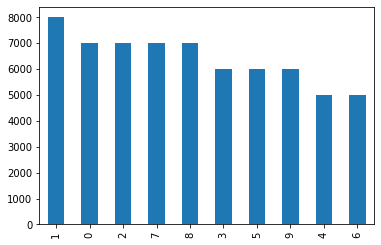

In [ ]:
labelsCsv["first_num"].value_counts().plot.bar()
plt.show

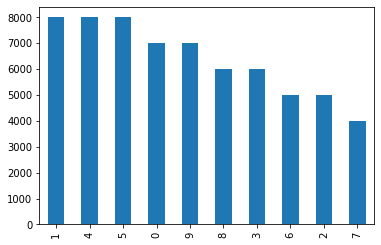

In [ ]:
labelsCsv["second_num"].value_counts().plot.bar()

In [ ]:
labelsCsv["first_num"].value_counts().median()

6500.0

In [ ]:
labelsCsv["second_num"].value_counts().median()

6500.0

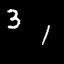

In [ ]:

Image("/content/drive/MyDrive/newProjectcollabAIML/digit identification project/train_images/705_31.png")

In [ ]:
imgNames=["/content/drive/MyDrive/newProjectcollabAIML/digit identification project/train_images/" + i for i in labelsCsv["Image"]]
#imgNames

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
nums1Names=labelsCsv["first_num"]
nums1Names=np.array(nums1Names)

nums2Names=labelsCsv["second_num"]
nums2Names=np.array(nums2Names)

nums1Names

array([0, 0, 0, ..., 9, 9, 9])

In [ ]:
nums2Names

array([0, 0, 0, ..., 8, 8, 8])

In [ ]:
uniqueNums=np.unique(nums1Names)
uniqueNums

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
print(len(nums1Names))
print(nums1Names[40000])

64000
6


In [ ]:
uniqueNums=np.unique(nums2Names)
uniqueNums

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
nums1Names[40000]==uniqueNums

array([False, False, False, False, False, False,  True, False, False,
       False])

In [ ]:
nums2Names[40000]==uniqueNums

array([False, False,  True, False, False, False, False, False, False,
       False])

In [ ]:
bool_num1=[num==uniqueNums for num in nums1Names]
bool_num1[:10]

[array([ True, False, False, False, False, False, False, False, False,
        False]),
 array([ True, False, False, False, False, False, False, False, False,
        False]),
 array([ True, False, False, False, False, False, False, False, False,
        False]),
 array([ True, False, False, False, False, False, False, False, False,
        False]),
 array([ True, False, False, False, False, False, False, False, False,
        False]),
 array([ True, False, False, False, False, False, False, False, False,
        False]),
 array([ True, False, False, False, False, False, False, False, False,
        False]),
 array([ True, False, False, False, False, False, False, False, False,
        False]),
 array([ True, False, False, False, False, False, False, False, False,
        False]),
 array([ True, False, False, False, False, False, False, False, False,
        False])]

In [ ]:
bool_num2=[num==uniqueNums for num in nums2Names]
bool_num2[:10]

[array([ True, False, False, False, False, False, False, False, False,
        False]),
 array([ True, False, False, False, False, False, False, False, False,
        False]),
 array([ True, False, False, False, False, False, False, False, False,
        False]),
 array([ True, False, False, False, False, False, False, False, False,
        False]),
 array([ True, False, False, False, False, False, False, False, False,
        False]),
 array([ True, False, False, False, False, False, False, False, False,
        False]),
 array([ True, False, False, False, False, False, False, False, False,
        False]),
 array([ True, False, False, False, False, False, False, False, False,
        False]),
 array([ True, False, False, False, False, False, False, False, False,
        False]),
 array([ True, False, False, False, False, False, False, False, False,
        False])]

In [ ]:
#bool_num1[:10:-1]

In [ ]:
for i in (bool_num1[:10]):
  print(i.astype(int))

[1 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0]


In [ ]:
x=imgNames
y1=[i.astype(int) for i in bool_num2]
y2=bool_num2
len(imgNames)

64000

In [ ]:
len(x)

64000

In [ ]:
numImg=29000 #@param {type:"slider",min:1000, max:64000,step:1000}

In [ ]:
xTr, xVal, yTr, yVal=train_test_split(x[:numImg],nums1Names[:numImg],test_size=0.3,random_state=200)
len(xTr),len(yVal),len(yTr),len(yVal)

(44800, 19200, 44800, 19200)

In [ ]:
xTr[690],yTr[690]
#xVal[690]

('/content/drive/MyDrive/newProjectcollabAIML/digit identification project/train_images/113_42.png',
 4)

In [ ]:
j=0
for i in range(len(x)):
  print(x[len(x)-i-1])
  j+=1
  if(j>=10):
    break

Now we turn imgs into tensors!!!

In [ ]:
im1=imread(imgNames[50000])
im1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
im1.shape

(64, 64)

In [ ]:
imgNames[50000]

'/content/drive/MyDrive/newProjectcollabAIML/digit identification project/train_images/0_79.png'

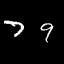

In [ ]:
Image(imgNames[50000])

In [ ]:
im1.max(),im1.min()

(1.0, 0.0)




**Next step converts image to tensors**





In [ ]:
tf.constant(im1)

<tf.Tensor: shape=(64, 64), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [ ]:
trial1=np.array(tf.constant(im1)[29:40])
trial1.max(),trial1.min()

(1.0, 0.0)

In [ ]:
#tf.constant(im1)[29:40]

In [ ]:
img_size=224

now we try to process our image data into the required shape and size format for image processing, we aim for 224x224 sized images


so now we define a funtion to upscale/downscale images

In [ ]:
def convertinImages(imgAddress,iSize=img_size):
  #converts file to a tensor in string form
  imgName=tf.compat.as_str_any(imgAddress)
  dataImage=tf.io.read_file(imgName)

  #makes image data in form of 0-255 rgb(when channel=3) values of colours
  dataImage=tf.image.decode_png(dataImage,channels=3)

  #now we do normalisation, i.e. convert image in tensor form from above output
  #containg pixel values from 0-255 into 0-1 values
  dataImage=tf.image.convert_image_dtype(dataImage,tf.float32)

  #now we resize image
  dataImage=tf.image.resize(dataImage,size=[iSize,iSize])
  return dataImage


In [ ]:
example1=tf.io.read_file(imgNames[40000])
imgNames[40000],example1

('/content/drive/MyDrive/newProjectcollabAIML/digit identification project/train_images/0_62.png',
 <tf.Tensor: shape=(), dtype=string, numpy=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00@\x00\x00\x00@\x08\x00\x00\x00\x00\x8f\x02.\x02\x00\x00\x01\xc4IDATx\xda\xed\x96?H[Q\x18\xc5O4D\x89&\xfe#T\x14\tV4(\x14\xc1\xa1\xd0-R\xc1I\x11+E\x1d\xa4\x83\x83\x98\xa1CU\xd0R\x9a\xa1\x8b\xe0f\x17\x87fS\x07)\x15\x15Qb\xa7v{\xf0P\xda\x86\x04Q\xe19t\x10E-V\x12\xfdN;X\xac\x83\x11\xdf\xbd\x93\xf8\xcet\xef\xbb\x9c\xdf\xfb\xee\xf7\x07.\xe0\xc8\x91#GwR]&96\xeaSt\xb7\x99fZD(\xc7\xd1\x07W>\xbbo\rp7\xc6sM\xc0\xd5S\xf0\xe6\xd13\x95\x08|\xa1\x82\x00\x00DE\xb6kT"\xf8\x95\xc2\t\x00\xf8\x81\xd5-\xf5<V\x8ddd\xda\xaf\xee\x0f&)\xa9ju\x7fnL8\xe7\xd5\xf8\x7fL$\xe2\xd1\xb8\x7fRdY\xa7\x11\xd7\xc8\x88\x8e?\x9c\x919\x8f\x0e`XR\xd7\xe4/\xc7\xc6(\xe1\xfc\xb7\x16\xe0z\xd9\x00\xec^\xae\x8a\xd4Z\xb1E\x8e\xc2\x00J\xeb\xa7\xbe\xc4T\x86\t?\x12\rC\xd6[\x84B\xa7\x93\x1bj\xd7]\x12\x11\xf9\xb3\xd2T\x92\xe5\xbc\xf8\xab\xd5\x7f#\xa0\xe

In [ ]:
example2=tf.image.decode_png(example1,channels=3)
example2[33:34]
#found by hit and trial on ranges between 1 and 64


<tf.Tensor: shape=(1, 64, 3), dtype=uint8, numpy=
array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],


In [ ]:
example3=tf.image.convert_image_dtype(example2,tf.float32)
example3[33:34]

<tf.Tensor: shape=(1, 64, 3), dtype=float32, numpy=
array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.     

explanations of the defined functions end here




.








.

Making batches from data

i.e. we use small portions of data(images) and their labels at a time, generally 32 images at a time

32 here will be the batch size


we make the system look for patter n those 32 sets of images and then again for next 32 sets of images and so on
makes the process consume less memory(RAM) and also makes it easier to wok on large data as it focuses on patterns from a group of data rather than idividual data, thereby reducing errors from individual data elements

we use tensor tuples in tensorflow which is in for of (image in form of tensos, label)

In [ ]:
#function to return tuple of tensors

def getLabel(imgAddress,numName):
  img=convertinImages(imgAddress,img_size)
  return img,numName
  

In [ ]:
(convertinImages(x[40000],img_size),tf.constant(y1[40000]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]], 

In [ ]:
x[40000]

'/content/drive/MyDrive/newProjectcollabAIML/digit identification project/train_images/0_62.png'

we can now make data into tensor tuples like(image,label)

now we turn all our data, x and y, into batches 

In [ ]:
batchSize=32 #32 is default, we can change it depending on our need and future changes in data

def MakeDataBatch(x,y=None,batch_size=batchSize,valid_data=False,testData=False):
  # now we make batches of data from x(image) and y(labels) pairs
  # if its taining data, it shuffles the data but doesnt shuffle if its validationd data
  #also accepts test data as input, thts where we take y=none as it wont have labels, as we r supposed to guess the labels for it

  if(testData):
    print("creating data batches..")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x)))
    dataBatch=data.map(convertinImages).batch(batch_size) 
    #applies the convertinImages function to all elements in data (mapping) with batchsize of consecutive elements of 32

    #like 0 to 8 in 3 batches gets divided as 0 1 2, 3 4 5 ,6 7 8
    return dataBatch 
  elif(valid_data):
    print("creating valid data batches....")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x),#making filepaths and labels into tensors
                                             tf.constant(y)))
    dataBatch=data.map(getLabel).batch(batch_size)#creates image, label into tuples, also turns image path into preprocessed image
    return dataBatch
  else:
    print("Creating training databatches.......")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x)),
                                            (tf.constant(y)))
    #now we shuffle filepaths and labels
    data=data.shuffle(buffer_size=len(x))  #buffer_seze=len(x) shffles entire dataset ,buffer_size=300 only shuffles first 300 data

    dataBatch=data.map(getLabel).batch(batch_size)
    
    return dataBatch

In [ ]:
# data=tf.data.Dataset.from_tensor_slices( (tf.constant(xTr)), (tf.constant((yTr)) ) )
# data

In [ ]:
# j=0
# for i in data:
#   print(i)
#   j+=1
#   if(j>2):
#     break

In [ ]:
# tensor1 = tf.range(12)
# tensor1

In [ ]:
# dataset = tf.data.Dataset.from_tensor_slices(tensor1)
# print(dataset)


In [ ]:
# dataset=data.batch(4)
# dataset

In [ ]:
# j=0
# for i in dataset:
#   print(i)
#   print("batch end")
#   j+=1
#   if(j>2):
#     break

In [1]:
#  #testing above function 

# trainData=MakeDataBatch(xTr,yTr)
# validData=MakeDataBatch(xVal,yVal,valid_data=True)

# #if we get "creating ......." line, it works

In [ ]:
trainData.element_spec

In [ ]:
validData.element_spec

In [ ]:
#second line output showing shape=(none,10) means batch size is none(even though it is 32, but it shows none coz its flexible)
# and 10 is the size of labels which is 10 coz we have 10 unique labels

In [ ]:
# plt.hist(yTr)

Visualisation of data batches 

In [ ]:
#def View20Imgs(imgs,labels):
plt.figure(figsize=(10,10))
for imgs in trainData:
  for i in range(20):
    plt.subplot(5,4,i+1)
    plt.imshow(imgs[i].numpy().astype("uint8"))



In [ ]:
#  uniqueNums[y1[40000].argmax()],y1[60000]

In [ ]:

 # train_Img,train_Label = list(trainData)
xTr[0],yTr[0]

In [ ]:
xTr, yTr =next(iter(trainData))
xTr,yTr

In [ ]:
inputShape=[None,img_size,img_size,3]  #batch, ht, wdt, colors

outputShape=len(uniqueNums)
